<a href="https://colab.research.google.com/github/DineshKumar1239/Deep-Learning-Projects/blob/main/DL_project_2_MNIST_classification_with_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(42)
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [ ]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(x_train[10].shape)

(28, 28)


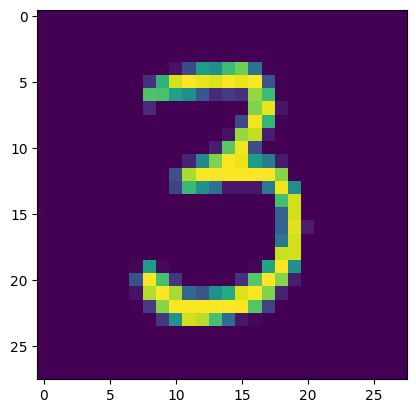

3


In [ ]:
plt.imshow(x_train[50])
plt.show()

print(y_train[50])

In [ ]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [ ]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(10,activation="sigmoid")
])



model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])


model.fit(x_train,y_train,epochs=10)



Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2976 - accuracy: 0.9144
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1403 - accuracy: 0.9580
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1033 - accuracy: 0.9681
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0815 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0684 - accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0584 - accuracy: 0.9816
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0503 - accuracy: 0.9843
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0448 - accuracy: 0.9858
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0378 - accuracy: 0.9878
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0

training accuracy=98.9%

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1046 - accuracy: 0.9710


[0.10458565503358841, 0.9710000157356262]

testing accuracy-97.1


In [ ]:
print(x_test.shape)

(10000, 28, 28)


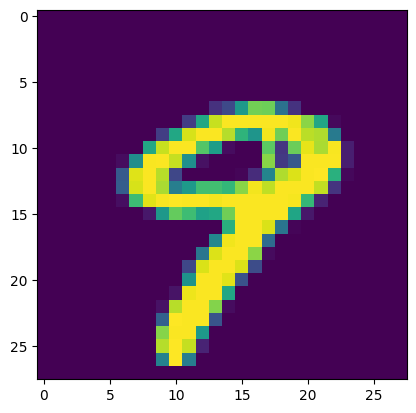

In [ ]:
plt.imshow(x_test[9])
plt.show()

In [ ]:


print(y_test[9])

9


In [ ]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


In [ ]:
print(y_pred[9])

[8.0976408e-04 6.9193511e-08 1.2680637e-06 2.2638418e-02 4.0849152e-01
 1.3452311e-04 1.4341928e-10 2.8517397e-02 9.4158769e-02 9.9999857e-01]


In [ ]:
label_test_image=np.argmax(y_pred[8]
                           )
label_test_image

5

In [ ]:
y_pred_label=[np.argmax(i) for i in y_pred]
print(y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 0, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(y_pred)

[[2.2732498e-01 2.8414801e-03 2.6872039e-01 ... 9.9979174e-01
  3.1865556e-02 4.7889954e-01]
 [5.9354602e-07 9.6934170e-01 9.9999917e-01 ... 7.0371743e-07
  3.9943619e-04 4.4433790e-11]
 [6.8550481e-04 9.9390656e-01 6.8314219e-01 ... 2.5213001e-02
  5.9434974e-01 3.8276654e-04]
 ...
 [2.9407198e-07 1.7426313e-04 7.3828836e-08 ... 2.6549341e-03
  1.9404346e-02 9.2102307e-01]
 [7.4496440e-04 1.0069801e-08 4.8515454e-09 ... 1.7729521e-06
  1.7874746e-01 2.5052309e-06]
 [3.8372877e-05 3.9696242e-06 6.4193664e-08 ... 2.3694616e-05
  5.0659850e-04 3.1733286e-08]]


In [ ]:
#y_test-true labels

#y_pred_labels-predicted labels

In [ ]:
conf=confusion_matrix(y_test,y_pred_label)
print(conf)

tf.Tensor(
[[ 972    0    1    2    0    1    2    0    2    0]
 [   0 1120    1    4    0    0    3    1    6    0]
 [   4    2 1008    3    4    2    1    2    6    0]
 [   1    0    2  986    0   14    0    2    4    1]
 [   1    0    3    0  960    0    3    2    0   13]
 [   3    0    0    7    0  872    4    0    4    2]
 [   6    1    2    1   13    8  923    0    4    0]
 [   1    5   11   14    3    2    0  978    8    6]
 [   6    0    4   13    7    7    0    2  932    3]
 [   5    2    0   14   16    4    1    5    3  959]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'predicted labels')

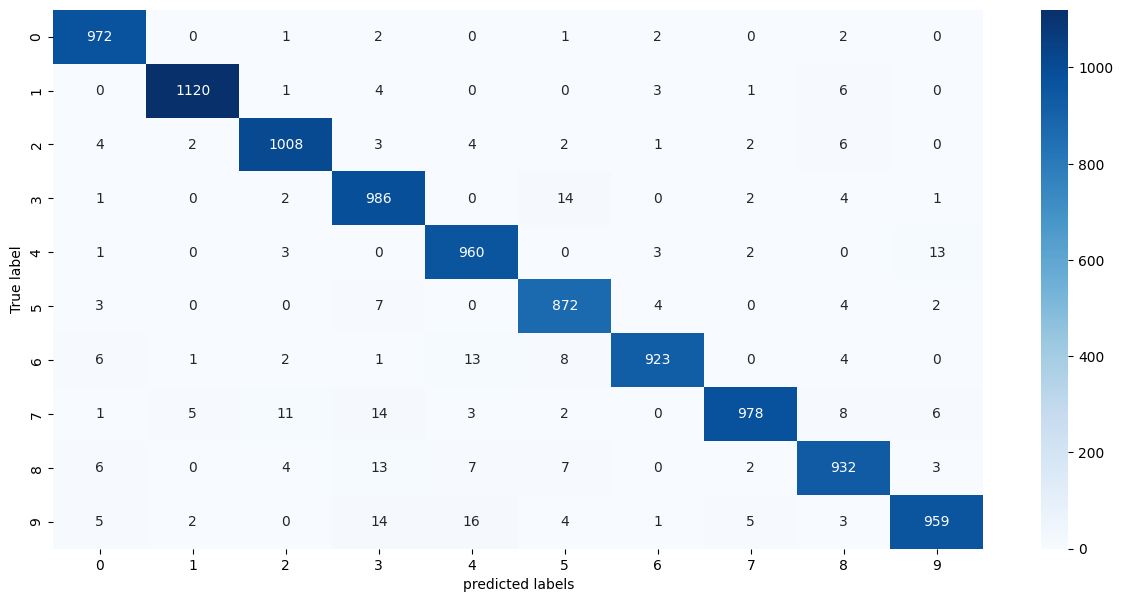

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf,annot=True,fmt="d",cmap="Blues")
plt.ylabel("True label")
plt.xlabel("predicted labels")

In [ ]:
input_image_path="/content/MNIST_digit.png"

In [ ]:
input_image=cv2.imread(input_image_path)

In [ ]:
type(input_image)

NoneType

In [ ]:
print(input_image)

None


In [ ]:
cv2_imshow(input_image)

AttributeError: ignored

In [ ]:
input_image.shape

In [ ]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

In [ ]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [ ]:
input_image_resize.shape

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize=input_image_resize/255

In [ ]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [ ]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

In [ ]:
input_pred_label=np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

In [ ]:
input_image_path=input("path of image")
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(grayscale,(28,28))
image_reshaped=np.reshape(input_image_resize,[1,28,28])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
print("the handwritten digit is:",input_pred_label)